# A- Data Cleaning

## I) Importing Requirements

In [1]:
!python --version

Python 3.8.6


In [2]:
!python -m pip install --upgrade pip

  Using cached pip-21.0-py3-none-any.whl (1.5 MB)


In [150]:
!pip install contractions
!pip install emoji --upgrade
!pip install autocorrect
!pip install textblob
!pip install WordCloud

  Using cached emoji-1.2.0-py3-none-any.whl (131 kB)
  Using cached emoji-1.1.0-py3-none-any.whl (132 kB)


In [2]:
import pandas as pd
import numpy as np
import nltk
import spacy
import string
import csv
import re
import emoji
import contractions
import matplotlib.pyplot as plt
from textblob import TextBlob
from emo_unicode import EMOTICONS
from autocorrect import Speller
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

## II) Data Understanding

In [53]:
df = pd.read_csv("Pfizer_Tweets.csv")

In [54]:
df.head()

id                                              tweet
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...
3  1353906517582479360  Brussels threat to UK jab supplies as health c...
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...

In [55]:
df.shape

(72516, 2)

In [56]:
df.columns

Index(['id', 'tweet'], dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72516 entries, 0 to 72515
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      72516 non-null  int64 
 1   tweet   72516 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [58]:
# Detection of the missing values
df.isna().sum()

id       0
tweet    0
dtype: int64

## III) Data Preprocessing

Some of the common text preprocessing steps are:

- Lower casing
- Removal of Punctuations
- Removal of Stopwords
- Removal of Frequent words
- Removal of Rare words
- Stemming
- Lemmatization
- Removal of emojis
- Removal of emoticons
- Conversion of emoticons to words
- Conversion of emojis to words
- Removal of URLs
- Removal of HTML tags
- Chat words conversion
- Spelling correction


- Pre-processing
- Replace Emoticons by their polarity.
- Remove URLs and Targets.
- Expand acronyms. eg 'brb' to 'be right back'
- Remove stop words
- Tokenization
- Stemming
- Case-folding
- Remove punctuation marks
- Replace sequence of repeating characters eg. 'hellooooo' by 'helloo'
- http://goutamnair7.github.io/Twitter-Sentiment-Analysis/


### III) 1) Noise Removal

### III) 1) a- Removal of URLs

In [59]:
def remove_urls(text): 
    """
    custom function to remove urls from the tweets
    """
    regex_str = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})' 
    url_pattern = re.compile(regex_str) 
    return (url_pattern.sub(r'', text))

#example
text = "This text contains a random link to test this function. https://www.linkedin.com/in/ghassene-tanabene/"
remove_urls(text)

'This text contains a random link to test this function. '

In [60]:
df["clean_tweet"] = df["tweet"].apply(lambda text: remove_urls(text))
df.head()

id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  
0  @drsimonegold @coletteinusa you're not speakin...  
1  @JustinTrudeau So thanks my front line worker ...  
2  @NJDeptofHealth @GovMurphy I received my first...  
3  Brussels threat to UK jab supplies as health c...  
4  @GOP FALSE.  The Pfizer vaccine was developed ...

### III) 1) b- HTML tags removal

This technique is used mostly when we are doing web scraping with BeautifulSoup library for example.
But, to make sure that our text does not contain any html tags, we will use it to avoid all unexpected problems.

In [61]:
def remove_html_tags(text):
    """
    Custom function to remove Html tags from the text 
        :input: String
        :Output: String without html tags
    """
    html_pattern = r'<.*?>'
    txt_without_html = re.sub(pattern=html_pattern, repl=' ', string=text)
    return (txt_without_html)

df["clean_tweet"] = df["clean_tweet"].apply(lambda text: remove_html_tags(text))
df.head()

id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  
0  @drsimonegold @coletteinusa you're not speakin...  
1  @JustinTrudeau So thanks my front line worker ...  
2  @NJDeptofHealth @GovMurphy I received my first...  
3  Brussels threat to UK jab supplies as health c...  
4  @GOP FALSE.  The Pfizer vaccine was developed ...

### III) 1) c- Conversion of emojis to words

In [62]:
def convert_emojis_words(text):
    
    """
    custom function to convert emojis to words
    """
    demojized_text = emoji.demojize(text,delimiters=('','')).replace('_',' ')

    return (demojized_text)

#example of use case
text = "🤣 🔥"
convert_emojis_words(text)

'rolling on the floor laughing fire'

In [63]:
df["clean_tweet"] = df["clean_tweet"].apply(lambda text: convert_emojis_words(text))
df.head()

id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  
0  @drsimonegold @coletteinusa you're not speakin...  
1  @JustinTrudeau So thanks my front line worker ...  
2  @NJDeptofHealth @GovMurphy I received my first...  
3  Brussels threat to UK jab supplies as health c...  
4  @GOP FALSE.  The Pfizer vaccine was developed ...

### III) 1) d- Converting Emoticons to words

The purpose of converting emoticons to words is also the same as converting emojis to words techniques.<br>
Example : 
- <b>:-) → Happy face smiley</b> 

In [64]:
def convert_emoticons_words(text):
    for emot in EMOTICONS:
        emoticon_pattern = r'('+emot+')'
        # replace
        emoticon_words = EMOTICONS[emot]
        replace_text = emoticon_words.replace(",","")
        replace_text = replace_text.replace(":","")
        replace_text_list = replace_text.split()
        emoticon_name = '_'.join(replace_text_list)
        text = re.sub(emoticon_pattern, emoticon_name, text)
    return(text)

df["clean_tweet"] = df["clean_tweet"].apply(lambda text: convert_emoticons_words(text))
df.head()

id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  
0  @drsimonegold @coletteinusa you're not speakin...  
1  @JustinTrudeau So thanks my front line worker ...  
2  @NJDeptofHealth @GovMurphy I received my first...  
3  Brussels threat to UK jab supplies as health c...  
4  @GOP FALSE.  The Pfizer vaccine was developed ...

### III) 1) e- Converting chat conversation words to normal words

This preprocessing technique aims to replace abbreviations (chat conversation words) to normal words.<br>
Some people use short-form words in their chatting conversions for their simplicity. <br>
Example : 
- <b>BTW → By The Way</b> 

In [65]:
# importing a list of abbreviations
with open('slang.txt') as f:
    chat_words_str = f.read()
       
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

df["clean_tweet"] = df["clean_tweet"].apply(lambda text: chat_words_conversion(text))
df.head()

id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  
0  @drsimonegold @coletteinusa you're not speakin...  
1  @JustinTrudeau So thanks my front line worker ...  
2  @NJDeptofHealth @GovMurphy I received my first...  
3  Brussels threat to UK jab supplies as health c...  
4  @GOP FALSE. The Pfizer vaccine was developed i...

### III) 1) f- Expanding Word Contractions

In the English language, a word contraction is formed when two words are combined and made shorter by placing an apostrophe where letters have been omitted. Examples : 
- <b>I'm → I am</b> 
- <b>He'll → He will</b>

In [66]:
for i in range(len(df["id"])):
    try:
        df["clean_tweet"][i]=contractions.fix(df["clean_tweet"][i])
    except:
        print("error in the dataset line number ", i)
        pass    
df.head()

<ipython-input-66-86e54bcc5f66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_tweet"][i]=contractions.fix(df["clean_tweet"][i])


error in the dataset line number  18635


id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  
0  @drsimonegold @coletteinusa you are not speaki...  
1  @JustinTrudeau So thanks my front line worker ...  
2  @NJDeptofHealth @GovMurphy I received my first...  
3  Brussels threat to UK jab supplies as health c...  
4  @GOP FALSE. The Pfizer vaccine was developed i...

In [67]:
#The error in the line 18635 is due to the use of some different characters
print(df["clean_tweet"][18635])

Woman's severe reaction to Pfizer COVID vaccine prompts investigation @YouTube aracılığıylaİ PFIZER BIONTEC AŞISI KAS SİNİR SİSTEMİNİ TUTUYOR.


### III) 1) g- Lower Casing

In [68]:
df["clean_tweet"] = df["clean_tweet"].str.lower()

### III) 1) h- Extra Whitespaces Removal

In [69]:
def remove_extra_whitespaces(text):
    """
    Custom function to remove extra whitespaces
    :Input: String
    :Output: String without extra whitespaces
    """
    space_pattern = r'\s+'
    txt_without_space = re.sub(pattern=space_pattern, repl=" ", string=text)
    return (txt_without_space.strip())

df["clean_tweet"] = df["clean_tweet"].apply(lambda text: remove_extra_whitespaces(text))
df.head()

id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  
0  @drsimonegold @coletteinusa you are not speaki...  
1  @justintrudeau so thanks my front line worker ...  
2  @njdeptofhealth @govmurphy i received my first...  
3  brussels threat to uk jab supplies as health c...  
4  @gop false. the pfizer vaccine was developed i...

### III) 1) i- Numbers Removal

We can remove numbers from the text because problem statement doesn't require numbers. 

In [70]:
def remove_numbers(text):
    """
    Custom function to remove numbers from text
    :input: String
    :Output: String
    """
    number_pattern = r'\d+'
    txt_without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return(txt_without_number)


df["clean_tweet"] = df["clean_tweet"].apply(lambda text: remove_numbers(text))
#example 
print("before: \n\n",df["tweet"][2])
print("\nafter: \n\n",df["clean_tweet"][2])
df.head()

before: 

 @NJDeptofHealth @GovMurphy I received my first Pfizer vaccine 1 week ago at Rowan College, but I'm unable to schedule an appointment for my second shot. I called the Hot Line today and was disconnected 3 times. How can I get my second appointment? Thanks in advance!

after: 

 @njdeptofhealth @govmurphy i received my first pfizer vaccine   week ago at rowan college, but i am unable to schedule an appointment for my second shot. i called the hot line today and was disconnected   times. how can i get my second appointment? thanks in advance!


id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  
0  @drsimonegold @coletteinusa you are not speaki...  
1  @justintrudeau so thanks my front line worker ...  
2  @njdeptofhealth @govmurphy i received my first...  
3  brussels threat to uk jab supplies as health c...  
4  @gop false. the pfizer vaccine was developed i...

### III) 1) j- Removal of stopwords

In [71]:
STOPWORDS = set(stopwords.words('english'))
print(STOPWORDS,'\n\nnumber of stopwords = ',len(STOPWORDS))

{'nor', 'its', 'theirs', 'those', 'same', 'him', "didn't", 'or', 'am', "you've", 'off', 'which', 'what', 'been', 'above', 'have', 'our', 'all', 'needn', 'themselves', "shan't", 've', "should've", 'weren', 'until', 'few', 'ma', 'too', 'and', "that'll", 'has', 'the', 'very', 'ain', 'itself', 'then', 'where', 'she', 'don', 'because', 'me', 'before', 'against', 'most', "hadn't", 'when', 'd', "weren't", 'ourselves', 'of', 'between', 'at', 're', 'you', 'ours', 'did', 'hers', 'be', 'than', 'how', 'a', "wasn't", 'won', 'does', 'with', 'it', 'but', 'whom', 'during', "won't", 'wasn', 'so', 's', 'o', 'no', 'yours', 'them', 'couldn', 'had', 'they', 'in', 'both', "needn't", 'himself', 'after', 'can', "don't", "wouldn't", 'being', "isn't", 'll', 'from', "you'll", 'having', 'we', 'through', 'some', 'to', 'her', "she's", 'his', 'hadn', 'myself', 'yourselves', 'up', 'y', 'doing', 'any', 'only', "couldn't", 'under', 'm', 'wouldn', "it's", 'my', 'this', 'yourself', 'will', 'below', 'over', 'more', 'that'

In [72]:
def remove_stopwords(text):
    """
    custom function to remove the stopwords
    """
    return(" ".join([word for word in str(text).split() if word not in STOPWORDS]))

df["clean_tweet"] = df["clean_tweet"].apply(lambda text: remove_stopwords(text))
df.head()

id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  
0  @drsimonegold @coletteinusa speaking pfizer va...  
1  @justintrudeau thanks front line worker girlfr...  
2  @njdeptofhealth @govmurphy received first pfiz...  
3  brussels threat uk jab supplies health chiefs ...  
4  @gop false. pfizer vaccine developed germany a...

In [73]:
df["tweet"][0]

"@drsimonegold @coletteinusa you're not speaking about the Pfizer vaccine, nor the Moderna vaccine?   You're talking about the Zinc injection?  The medical community doesn't give the vaccine to someone who already has covid.    You're not explaining anything."

In [74]:
df["clean_tweet"][0]

'@drsimonegold @coletteinusa speaking pfizer vaccine, moderna vaccine? talking zinc injection? medical community give vaccine someone already covid. explaining anything.'

### III) 1) k- Removing single characters

In [75]:
def remove_single_char(text):
    """
    Custom function to remove single characters from the text
    :Input: string
    :Output: string
    """
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    txt_without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return(txt_without_sc)

df["clean_tweet"] = df["clean_tweet"].apply(lambda text: remove_single_char(text))
df.head()

id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  
0  @drsimonegold @coletteinusa speaking pfizer va...  
1  @justintrudeau thanks front line worker girlfr...  
2  @njdeptofhealth @govmurphy received first pfiz...  
3  brussels threat uk jab supplies health chiefs ...  
4  @gop false. pfizer vaccine developed germany a...

### III) 1) l- Removal of Punctuations

In [76]:
PUNCT_TO_REMOVE = string.punctuation+'“”'
PUNCT_TO_REMOVE

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~“”'

In [77]:
def remove_punctuation(text):
    """
    custom function to remove the punctuation (specific characters)
    
    """
    return(text.translate(str.maketrans('', '', PUNCT_TO_REMOVE)))

df["clean_tweet"] = df["clean_tweet"].apply(lambda text: remove_punctuation(text))

In [78]:
df["tweet"][0]

"@drsimonegold @coletteinusa you're not speaking about the Pfizer vaccine, nor the Moderna vaccine?   You're talking about the Zinc injection?  The medical community doesn't give the vaccine to someone who already has covid.    You're not explaining anything."

In [79]:
df["clean_tweet"][0]

'drsimonegold coletteinusa speaking pfizer vaccine moderna vaccine talking zinc injection medical community give vaccine someone already covid explaining anything'

### III) 1) m- Spelling Correction

Spelling correction is another important preprocessing technique while working with tweets, comments, etc. Because we can see incorrect spelling words in those areas of text. We need to make those misspelling words to correct spelling words.
<br>
We can use autocorrect or spellchecker python libraries.

In [ ]:
def spell_autocorrect(text):
    """
    Custom function to correct spelling words
    :Input: string
    :Output: string
    """
    correct_spell_words = []

    # initialize Speller object for english language with 'en'
    spell_corrector = Speller(lang='en')
    for word in word_tokenize(text):
        # correct spell word
        correct_word = spell_corrector(word)
        correct_spell_words.append(correct_word)

    correct_spelling = ' '.join(correct_spell_words)
    return(correct_spelling)

for i in range(len(df["id"])):
    try:
        df["clean_tweet"][i]=spell_autocorrect(df["clean_tweet"][i])
    except:
        print("error in the dataset line number ", i)
        pass

<ipython-input-37-744021ec505a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_tweet"][i]=spell_autocorrect(df["clean_tweet"][i])


error in the dataset line number  3247
error in the dataset line number  3262
error in the dataset line number  3269
error in the dataset line number  3271
error in the dataset line number  3272
error in the dataset line number  3273
error in the dataset line number  3274
error in the dataset line number  3275
error in the dataset line number  3276
error in the dataset line number  3277
error in the dataset line number  3278
error in the dataset line number  3279
error in the dataset line number  3280
error in the dataset line number  3281
error in the dataset line number  3282
error in the dataset line number  3285
error in the dataset line number  3292
error in the dataset line number  3295
error in the dataset line number  3296
error in the dataset line number  3298
error in the dataset line number  3299
error in the dataset line number  3300
error in the dataset line number  3301
error in the dataset line number  3302
error in the dataset line number  3303
error in the dataset line

### III) 2) Tokenization

Tokenization is the process of splitting the given text into smaller pieces called tokens.

In [80]:
#words Tokenization
df["new_clean_tweet"] = df["clean_tweet"].apply(lambda text: word_tokenize(text))
df.head()

id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  \
0  drsimonegold coletteinusa speaking pfizer vacc...   
1  justintrudeau thanks front line worker girlfri...   
2  njdeptofhealth govmurphy received first pfizer...   
3  brussels threat uk jab supplies health chiefs ...   
4  gop false pfizer vaccine developed germany ame...   

                                     new_clean_tweet  
0  [drsimonegold, coletteinusa, speaking, pfizer,...  
1  [justintrudeau, thanks, front, line, worker, g...  
2  [njdeptofhealth, govmurphy, received, first, p...  
3  [brussels, threat, uk, jab, supplies, health, ...  
4  [gop, false, pfizer, vaccine, developed, germa...

### III) 3) Stemming

Stemming is the process of eliminating affixes (suffixed, prefixes, infixes, circumfixes) from a word in order to obtain a word stem.<br>
<b> running → run </b>

In [81]:
stemmer = PorterStemmer()
def stem_words(tokens):
    """
    custom function to achieve stemming
    :input: list of tokens
    !output: word stem list
    """
    
    #return " ".join([stemmer.stem(word) for word in tokens])
    return ([stemmer.stem(word) for word in tokens])

df["new_clean_tweet"] = df["new_clean_tweet"].apply(lambda text: stem_words(text))
df.head()

id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  \
0  drsimonegold coletteinusa speaking pfizer vacc...   
1  justintrudeau thanks front line worker girlfri...   
2  njdeptofhealth govmurphy received first pfizer...   
3  brussels threat uk jab supplies health chiefs ...   
4  gop false pfizer vaccine developed germany ame...   

                                     new_clean_tweet  
0  [drsimonegold, coletteinusa, speak, pfizer, va...  
1  [justintrudeau, thank, front, line, worker, gi...  
2  [njdeptofhealth, govmurphi, receiv, first, pfi...  
3  [brussel, threat, uk, jab, suppli, health, chi...  
4  [gop, fals, pfizer, vaccin, develop, germani, ...

### III) 4) Lemmatization

Lemmatization is related to stemming, differing in that lemmatization is able to capture canonical forms based on a word's lemma.

For example, stemming the word "better" would fail to return its citation form (another word for lemma). <br>However, lemmatization would result in the following: <b>better → good</b> <br> 
It should be easy to see why the implementation of a stemmer would be the less difficult feat of the two.

In [31]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(tokens):
    """
    custom function to achieve Lemmatization
    :input: list of tokens
    :output: list of tokens after lemmatization
    """
    return([lemmatizer.lemmatize(word) for word in tokens])

df["new_clean_tweet"] = df["new_clean_tweet"].apply(lambda text: lemmatize_words(text))
df.head()

id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  \
0  drsimonegold coletteinusa speaking pfizer vacc...   
1  justintrudeau thanks front line worker girlfri...   
2  njdeptofhealth govmurphy received first pfizer...   
3  brussels threat uk jab supplies health chiefs ...   
4  gop false pfizer vaccine developed germany ame...   

                                     new_clean_tweet  Subjectivity  Polarity  \
0  [[, ', d, r, s, i, m, o, n, e, g, o, l, d, ', ...      0.000000     0.000   
1  [[, ', j, u, s, t, i, n, t, r, u, d, e, a, u, ...      0.000000     0.000   
2  [[, ', n, j, d, e, p, t, o, f, h, e, a, l, t, ...      0.295833     0.125   
3  [[, ', b, r, u, s, s, e, l, ', ,,  , ', t, h, ...      0.000000     0.000   
4  [[, ', g, o, p, ', ,,  , ', f, a, l, s, ', ,, ...      0.050000     0.000   

                                         final_tweet Sentiment  
0  drsimonegold coletteinusa speak pfizer vaccin ...   Neutral  
1  justintrudeau thank front line worker girlfrie...   Neutral  
2  njdeptofhealth govmurphi receiv first pfizer v...  Positive  
3  brussel threat uk jab suppli health chief tell...   Neutral  
4  gop fals pfizer vaccin develop germani america...   Neutral

In [87]:
print("before: \n\n",df["clean_tweet"][2])
print("\nafter: \n\n",df["new_clean_tweet"][2])

before: 

 njdeptofhealth govmurphy received first pfizer vaccine week ago rowan college unable schedule appointment second shot called hot line today disconnected times get second appointment thanks advance

after: 

 ['njdeptofhealth', 'govmurphi', 'receiv', 'first', 'pfizer', 'vaccin', 'week', 'ago', 'rowan', 'colleg', 'unabl', 'schedul', 'appoint', 'second', 'shot', 'call', 'hot', 'line', 'today', 'disconnect', 'time', 'get', 'second', 'appoint', 'thank', 'advanc']


# B- Sentiment Analysis

#### 1) Subjectivity

In [32]:
def join_tokens(tokens):   
    """
    custom function to join the tokens
    :input: list of tokens
    :output: string of tokens 
    """
    text= " ".join([word for word in tokens])
    return(text)

In [163]:
df["final_tweet"]=df["new_clean_tweet"].apply(join_tokens)
df.head()

id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  \
0  drsimonegold coletteinusa speaking pfizer vacc...   
1  justintrudeau thanks front line worker girlfri...   
2  njdeptofhealth govmurphy received first pfizer...   
3  brussels threat uk jab supplies health chiefs ...   
4  gop false pfizer vaccine developed germany ame...   

                                     new_clean_tweet  Subjectivity  Polarity  \
0  [drsimonegold, coletteinusa, speak, pfizer, va...      0.000000     0.000   
1  [justintrudeau, thank, front, line, worker, gi...      0.000000     0.000   
2  [njdeptofhealth, govmurphi, receiv, first, pfi...      0.295833     0.125   
3  [brussel, threat, uk, jab, suppli, health, chi...      0.000000     0.000   
4  [gop, fals, pfizer, vaccin, develop, germani, ...      0.050000     0.000   

                                         final_tweet  
0  drsimonegold coletteinusa speak pfizer vaccin ...  
1  justintrudeau thank front line worker girlfrie...  
2  njdeptofhealth govmurphi receiv first pfizer v...  
3  brussel threat uk jab suppli health chief tell...  
4  gop fals pfizer vaccin develop germani america...

In [161]:
# Create a function to get the subjectivity
def getSubjectivity(tokens): 
    """
    custom function to calculate the subjectivity
    :input: list of tokens
    :output: subjectivity (float)
    """
    text= join_tokens(tokens)
    return(TextBlob(text).sentiment.subjectivity)

# Create new column 'Subjectivity'
df['Subjectivity'] = df['new_clean_tweet'].apply(getSubjectivity)
df.head()

id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  \
0  drsimonegold coletteinusa speaking pfizer vacc...   
1  justintrudeau thanks front line worker girlfri...   
2  njdeptofhealth govmurphy received first pfizer...   
3  brussels threat uk jab supplies health chiefs ...   
4  gop false pfizer vaccine developed germany ame...   

                                     new_clean_tweet  Subjectivity  
0  [drsimonegold, coletteinusa, speak, pfizer, va...      0.000000  
1  [justintrudeau, thank, front, line, worker, gi...      0.000000  
2  [njdeptofhealth, govmurphi, receiv, first, pfi...      0.295833  
3  [brussel, threat, uk, jab, suppli, health, chi...      0.000000  
4  [gop, fals, pfizer, vaccin, develop, germani, ...      0.050000

#### 2- Polarity

In [162]:
# Create a function to get the polarity
def getPolarity(tokens):    
    """
    custom function to calculate the polarity
    :input: list of tokens
    :output: polarity (float)
    """
    text= join_tokens(tokens)
    return(TextBlob(text).sentiment.polarity)

# Create new columns 'Polarity'
df['Polarity'] = df['new_clean_tweet'].apply(getPolarity)
df.head()

id                                              tweet  \
0  1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1  1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2  1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3  1353906517582479360  Brussels threat to UK jab supplies as health c...   
4  1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   

                                         clean_tweet  \
0  drsimonegold coletteinusa speaking pfizer vacc...   
1  justintrudeau thanks front line worker girlfri...   
2  njdeptofhealth govmurphy received first pfizer...   
3  brussels threat uk jab supplies health chiefs ...   
4  gop false pfizer vaccine developed germany ame...   

                                     new_clean_tweet  Subjectivity  Polarity  
0  [drsimonegold, coletteinusa, speak, pfizer, va...      0.000000     0.000  
1  [justintrudeau, thank, front, line, worker, gi...      0.000000     0.000  
2  [njdeptofhealth, govmurphi, receiv, first, pfi...      0.295833     0.125  
3  [brussel, threat, uk, jab, suppli, health, chi...      0.000000     0.000  
4  [gop, fals, pfizer, vaccin, develop, germani, ...      0.050000     0.000

####  3- Visualization

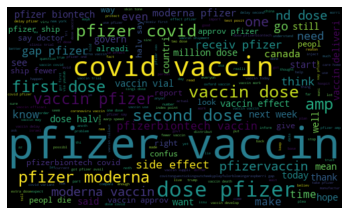

In [164]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['final_tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### 4- Labelling the data : Sentiment Classification of tweets

In [165]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getSentiment(score):  
    """
    custom function to make tweet sentiment classification
    :input: float (polarity)
    :output: string (sentiment class)
    """
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
#Create the label Sentiment based on polarity     
df['Sentiment'] = df['Polarity'].apply(getSentiment)
df

id                                              tweet  \
0      1353906918520197121  @drsimonegold @coletteinusa you're not speakin...   
1      1353906775175512064  @JustinTrudeau So thanks my front line worker ...   
2      1353906627343224833  @NJDeptofHealth @GovMurphy I received my first...   
3      1353906517582479360  Brussels threat to UK jab supplies as health c...   
4      1353906461366128640  @GOP FALSE.  The Pfizer vaccine was developed ...   
...                    ...                                                ...   
72511  1350263597952282628  😭 "Canada will see a 'temporary' delay in supp...   
72512  1350263565131919363  @GwynneThomson @RachelNNP121 @twincities83 @Dr...   
72513  1350263513290215430  Thank-you for making the vaccine Pfizer. 👍  Bu...   
72514  1350263510576590859  Absolutamente ningún síntoma, solo molestia en...   
72515  1350263455140380674  Got that 2nd dose #Pfizervaccine #CovidVaccine...   

                                             clean_tweet  \
0      drsimonegold coletteinusa speaking pfizer vacc...   
1      justintrudeau thanks front line worker girlfri...   
2      njdeptofhealth govmurphy received first pfizer...   
3      brussels threat uk jab supplies health chiefs ...   
4      gop false pfizer vaccine developed germany ame...   
...                                                  ...   
72511  loudly crying face canada see temporary delay ...   
72512  gwynnethomson rachelnnp twincities drericding ...   
72513  thankyou making vaccine pfizer thumbs time pfu...   
72514  absolutamente ningún síntoma solo molestia en ...   
72515  got nd dose pfizervaccine covidvaccine healthc...   

                                         new_clean_tweet  Subjectivity  \
0      [drsimonegold, coletteinusa, speak, pfizer, va...      0.000000   
1      [justintrudeau, thank, front, line, worker, gi...      0.000000   
2      [njdeptofhealth, govmurphi, receiv, first, pfi...      0.295833   
3      [brussel, threat, uk, jab, suppli, health, chi...      0.000000   
4      [gop, fals, pfizer, vaccin, develop, germani, ...      0.050000   
...                                                  ...           ...   
72511  [loudli, cri, face, canada, see, temporari, de...      0.000000   
72512  [gwynnethomson, rachelnnp, twinciti, drericd, ...      0.166667   
72513  [thankyou, make, vaccin, pfizer, thumb, time, ...      0.000000   
72514  [absolutament, ningún, síntoma, solo, molestia...      0.700000   
72515  [got, nd, dose, pfizervaccin, covidvaccin, hea...      0.000000   

       Polarity                                        final_tweet Sentiment  
0         0.000  drsimonegold coletteinusa speak pfizer vaccin ...   Neutral  
1         0.000  justintrudeau thank front line worker girlfrie...   Neutral  
2         0.125  njdeptofhealth govmurphi receiv first pfizer v...  Positive  
3         0.000  brussel threat uk jab suppli health chief tell...   Neutral  
4         0.000  gop fals pfizer vaccin develop germani america...   Neutral  
...         ...                                                ...       ...  
72511     0.000  loudli cri face canada see temporari delay sup...   Neutral  
72512     0.125  gwynnethomson rachelnnp twinciti drericd pfize...  Positive  
72513     0.000  thankyou make vaccin pfizer thumb time pfuck y...   Neutral  
72514     0.400  absolutament ningún síntoma solo molestia en e...  Positive  
72515     0.000  got nd dose pfizervaccin covidvaccin healthcar...   Neutral  

[72516 rows x 8 columns]

In [35]:
# list of positive tweets from the dataset
print('Positive tweets:\n================\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Sentiment'][i] == 'Positive'):
        print(str(j) + ') '+ sortedDF['final_tweet'][i])
        print()
        j= j+1

Positive tweets:

1) njdeptofhealth govmurphi receiv first pfizer vaccin week ago rowan colleg unabl schedul appoint second shot call hot line today disconnect time get second appoint thank advanc

2) joelascol regreformedguy watch fda meet pfizer vaccin approv coupl expert insist pfizer unblind studi yet could gather data regard possibl transmiss vaccin peopl transmiss live viru nasal passag vax

3) nbcnew problem is one say mani vaccin manufactur moderna amp pfizer per dayfrom readit seem approx million shot day right now mayb plan increas least million produc day know exact number

4) mooretabithia aswrm renegadeflannel drsimonegold moderna tx pfizer safe vaccin take year develop complet new type vaccin never attempt befor month think safe face roll eyesgood thing degre medicin law like her

5) saskiapopescu first pfizer vaccin last thursday felt aw like covid hour expect wors side effect if anyconfus second dose first

6) spenc john skyriakideseu realiti eu developend import bionte

In [36]:
# list of positive tweets from the dataset 
print('Negative tweets:\n================\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Sentiment'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['final_tweet'][i])
        print()
        j=j+1

Negative tweets:

1) drajm sue dunlevi commerci confid realli order mil pfizer deliv small batch cours need million shot vaccin work wait see possibl stage

2) jakeustjanausk cole world behind distribut vaccin fact vaccin amaz especi two efficaci variant problem continu ramp vaccin pfizer moderna shown effect variant

3) govt insist pfizer conduct trial vaccin india global approv base data differ countri need mani vaccin vaccin popul fall behind nation pmoindia drharshvardhan

4) bidenadministrst failur provid adequ amount covid vaccin pfizer amp moderna distribut scarciti give peopl second dose booster shot promis cdc scienc mean mix differ brand vaccin busi bogu impeach

5) sad merck discontinu hope vaccin plan massiv product must part strategi could product facil use licens product pfizer moderna vaccin ask countryand world

6) pfizer want india order covid vaccin pursu approv compani slash half deliveri eu nation mohfw india agre ridicul diktat cc drharshvardhan amitshah hmoindia e

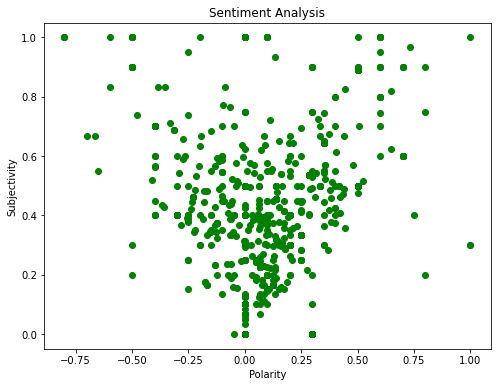

In [38]:
# Visualization of Sentiment analysis 

plt.figure(figsize=(8,6)) 

#for i in range(0, df.shape[0]):
for i in range(0, 1000):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Green') 

# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

#### 5- Percentage of positive tweets

In [184]:
ptweets = df[df.Sentiment == 'Positive']
ptweets = ptweets['final_tweet']
ptweets

print(round( (ptweets.shape[0] / df.shape[0]) * 100 , 1) , "%")

35.2 %


#### 6- Percentage of negative tweets

In [185]:
ntweets = df[df.Sentiment == 'Negative']
ntweets = ntweets['final_tweet']
ntweets

print(round( (ntweets.shape[0] / df.shape[0]) * 100, 1),"%")

15.6 %


In [186]:
# sentiment value counts
df['Sentiment'].value_counts()

Neutral     35705
Positive    25526
Negative    11285
Name: Sentiment, dtype: int64

####  7- Plotting and visualizing the counts

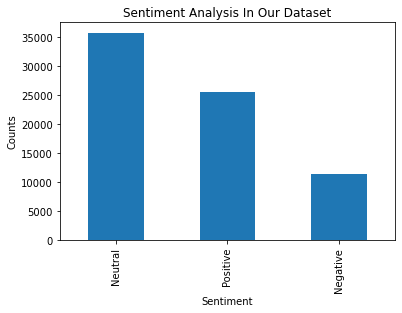

In [190]:
plt.title('Sentiment Analysis In Our Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentiment'].value_counts().plot(kind = 'bar')
plt.show()

<b>Conclusion:</b><br>
    After analysing a sample of 72 516 tweets, we conclude that the most of the feedbacks of corona virus vaccine were positive. <br>
    However, the higher percentage of tweets was neutral. Maybe, because it's too early to talk about the feedbacks of the vaccine which is not spread in the whole world.

In [189]:
#save the dataset
df.to_excel("./FinalDataset.xlsx", encoding='utf-8')
df.to_csv("./FinalDataset.csv", encoding='utf-8',index=False)